In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn.plotting import plot_roi

In [4]:
# load bold run 0 from one session for all subjects
paths = ["/jukebox/norman/rsiyer/rtmindeye/data_sub-001_ses-01/bids/derivatives/fmriprep/sub-001/ses-01/func/sub-001_ses-01_task-study_run-01_space-T1w_desc-preproc_bold.nii.gz",
         "/jukebox/norman/rsiyer/rtmindeye/data_sub-002_ses-02/bids/derivatives/fmriprep/sub-002/ses-02/func/sub-002_ses-02_task-A_run-01_space-T1w_desc-preproc_bold.nii.gz",
         "/jukebox/norman/rsiyer/rtmindeye/data_sub-003_ses-01/bids/derivatives/fmriprep/sub-003/ses-01/func/sub-003_ses-01_task-study_run-01_space-T1w_desc-preproc_bold.nii.gz",
         "/jukebox/norman/rsiyer/rtmindeye/data_sub-004/bids/derivatives/fmriprep/sub-004/ses-01/func/sub-004_ses-01_task-A_run-01_space-T1w_desc-preproc_bold.nii.gz"]

In [5]:
data = []
for p in paths:
    d = nib.load(p)
    print(d.shape)
    data.append(d)

(72, 94, 71, 192)
(102, 115, 97, 140)
(97, 128, 96, 140)
(96, 121, 93, 140)


In [6]:
means = []
for i in range(len(data)):
    means.append(np.mean(data[i].get_fdata(), axis=3))

In [7]:
means[0].shape

(72, 94, 71)

In [10]:
# import subject-specific nsdgeneral masks
nsd_paths = ["/jukebox/norman/rsiyer/rtmindeye/data_sub-001_ses-01/bids/derivatives/masks/sub-001/sub-001_nsdgeneral.nii.gz",
              "/jukebox/norman/rsiyer/rtmindeye/data_sub-002_ses-02/bids/derivatives/masks/sub-002/sub-002_task-A_nsdgeneral.nii.gz",
              "/jukebox/norman/rsiyer/rtmindeye/data_sub-003_ses-01/bids/derivatives/masks/sub-003/sub-003_nsdgeneral.nii.gz",
              "/jukebox/norman/rsiyer/rtmindeye/data_sub-004/bids/derivatives/masks/sub-004/sub-004_ses-01_task-A_nsdgeneral.nii.gz"]

In [11]:
nsds = []
for n in nsd_paths:
    nsds.append(nib.load(n))

In [12]:
# import brain masks
mask_paths = ["/jukebox/norman/rsiyer/rtmindeye/data_sub-001_ses-01/bids/derivatives/masks/sub-001/sub-001_ses-01_brain.nii.gz",
              "/jukebox/norman/rsiyer/rtmindeye/data_sub-002_ses-02/bids/derivatives/masks/sub-002/sub-002_ses-02_task-A_brain.nii.gz",
              "/jukebox/norman/rsiyer/rtmindeye/data_sub-003_ses-01/bids/derivatives/masks/sub-003/sub-003_ses-01_brain.nii.gz",
              "/jukebox/norman/rsiyer/rtmindeye/data_sub-004/bids/derivatives/masks/sub-004/sub-004_ses-01_task-A_brain.nii.gz"]

In [13]:
masks = []
for m in mask_paths:
    masks.append(nib.load(m))

In [14]:
masks[0].shape

(72, 94, 71)

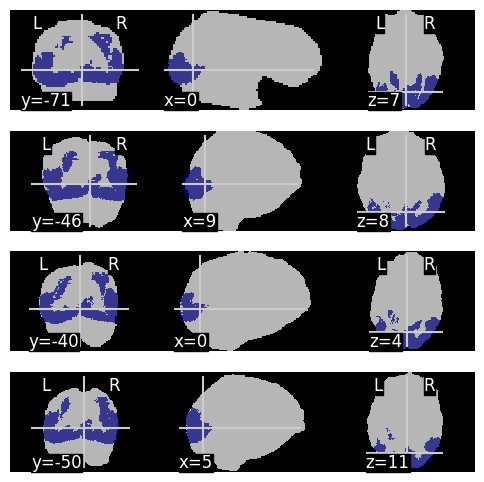

In [15]:
# plot nsdgeneral roi on mask for each subject
fig, ax = plt.subplots(len(masks), 1, figsize=(6, 6))
for i in range(len(masks)):
    plot_roi(nsds[i], bg_img=masks[i], axes=ax[i])

plt.show()

In [16]:
[[] for _ in range(len((nsds)))]

[[], [], [], []]

In [17]:
# mask roi then apply to flattened functional data
masked_rois = [[] for _ in range(len((nsds)))]
masked_data = masked_rois
for i in range(len(nsds)):
    m = masks[i].get_fdata().flatten().astype(bool)
    masked_rois[i] = nsds[i].get_fdata()
    masked_rois[i] = masked_rois[i].flatten()
    masked_rois[i] = masked_rois[i][m]
    masked_rois[i][np.isnan(masked_rois[i])] = 0
    masked_rois[i] = masked_rois[i].astype(bool)
    masked_data[i] = means[i].flatten()[m][masked_rois[i]]    

(72, 94, 71)
(102, 115, 97)
(97, 128, 96)
(96, 121, 93)


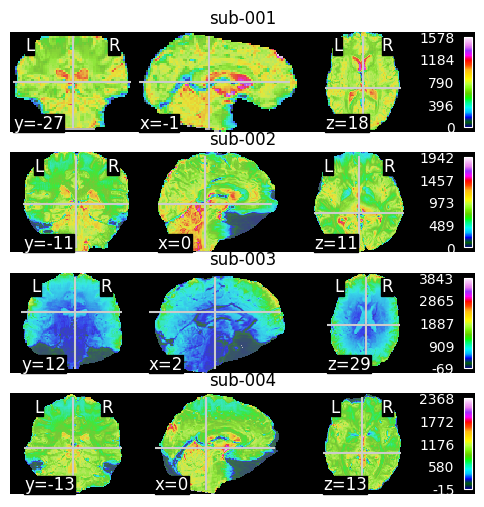

In [56]:
# plot the voxel-level mean bold signal intensity for each subject
fig, ax = plt.subplots(len(masked_data), 1, figsize=(6, 6))
for i, m in enumerate(means):
    m_3d = np.zeros(masks[i].shape)
    mask = masks[i].get_fdata().astype(bool)
    m_3d[mask] = m[mask]
    m_nii = nib.Nifti1Image(m_3d, affine=masks[i].affine)
    print(m_nii.shape)
    ax[i].set_title(f'sub-{i+1:03d}')
    plot_roi(m_nii, bg_img=masks[i], axes=ax[i], colorbar=True)

plt.show()


Subject	Mean	Std	Timepoints
------------------------------
sub-001 714.40 159.83, 192
sub-002 812.21 203.68, 140
sub-003 795.20 309.23, 140
sub-004 940.04 263.11, 140


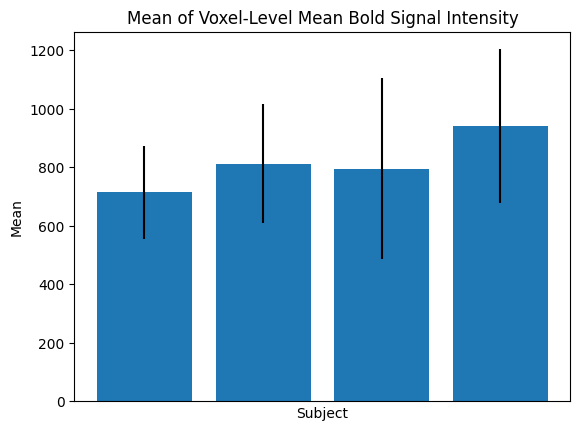

In [92]:
# print the mean and std of the voxel-level mean bold signal intensity for each subject
# plot the mean and std of the voxel-level mean bold signal intensity for each subject as a bar plot with error bars for the std
plt.bar(range(len(masked_data)), [np.mean(masked_data[i]) for i in range(len(masked_data))], yerr=[np.std(masked_data[i]) for i in range(len(masked_data))])
plt.xlabel('Subject')
plt.ylabel('Mean')
plt.title('Mean of Voxel-Level Mean Bold Signal Intensity')
plt.xticks([])
# add subject number as text at the bottom of each bar

for i, m in enumerate(masked_data):
    if i == 0:
        print("\nSubject\tMean\tStd\tTimepoints")
        print("-" * 30)

    print(f'sub-{i+1:03d} {np.mean(masked_data[i]):.2f} {np.std(masked_data[i]):.2f}, {data[i].shape[-1]}')
    
plt.show()

In [90]:
data[0].shape

(72, 94, 71, 192)